In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [4]:
# Fredkin Gate
def fkg(circ, a, b, c):
    circ.cx(c, b)
    qc.barrier()
    circ.ry((-1/2)*np.pi, c)
    circ.rz(1*np.pi/4, a)
    circ.rz(1*np.pi/4, b)
    circ.rz(1*np.pi/4, c)
    qc.barrier()
    circ.cx(a, b)
    circ.cx(b, c)
    qc.barrier()
    circ.rz(-1*np.pi/4, b)
    circ.rz(1*np.pi/4, c)
    circ.cx(a, b)
    circ.cx(b, c)
    circ.cx(a, b)
    qc.barrier()
    circ.rz(-1*np.pi/4, c)
    circ.cx(b, c)
    circ.rx(1/2, b)
    circ.rz(-1*np.pi/4, c)
    circ.cx(a, b)
    circ.cx(b, c)
    circ.rz(1*np.pi/2, c)
    circ.rx(1*np.pi/2, b)
    qc.barrier()
    circ.rx(-1*np.pi/2, c)

In [12]:
for i in range(8):
    # Create registers and circuit
    a = QuantumRegister(3, 'a')  # input
    qc = QuantumCircuit(a)

    # All combinations of input
    qc.barrier()
    
    if i <= 2: 
        qc.x(a[i])
    elif i == 3:
        qc.x(a[0])
        qc.x(a[1])
    elif i == 4:
        qc.x(a[1])
        qc.x(a[2])
    elif i == 5:
        qc.x(a[0])
        qc.x(a[2])    
    elif i == 6:        
        qc.x(a)
    else:
        pass
    
    fkg(qc, a[0], a[1], a[2])
    
    qc.barrier()

    # Measure the output
    m = ClassicalRegister(3, 'output')
    qc.add_register(m)
    qc.measure(a[0],0)
    qc.measure(a[1],1)
    qc.measure(a[2],2)


    # Simulate and show results
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=100)  # shots default = 1024
    result = job.result()
    print(result.get_counts())

{'001': 71, '011': 29}
{'010': 84, '000': 16}
{'100': 73, '110': 27}
{'101': 71, '111': 29}
{'100': 30, '110': 70}
{'001': 34, '011': 66}
{'101': 23, '111': 77}
{'010': 27, '000': 73}


In [14]:
# Create registers and circuit
a = QuantumRegister(3, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.barrier()

qxor(qc, a[0], a[1], a[2])

qc.barrier()
    
# Measure the output
m = ClassicalRegister(3, 'output')
qc.add_register(m)
qc.measure(a[0],0)
qc.measure(a[1],1)
qc.measure(a[2],2)


# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'010': 21, '000': 79}


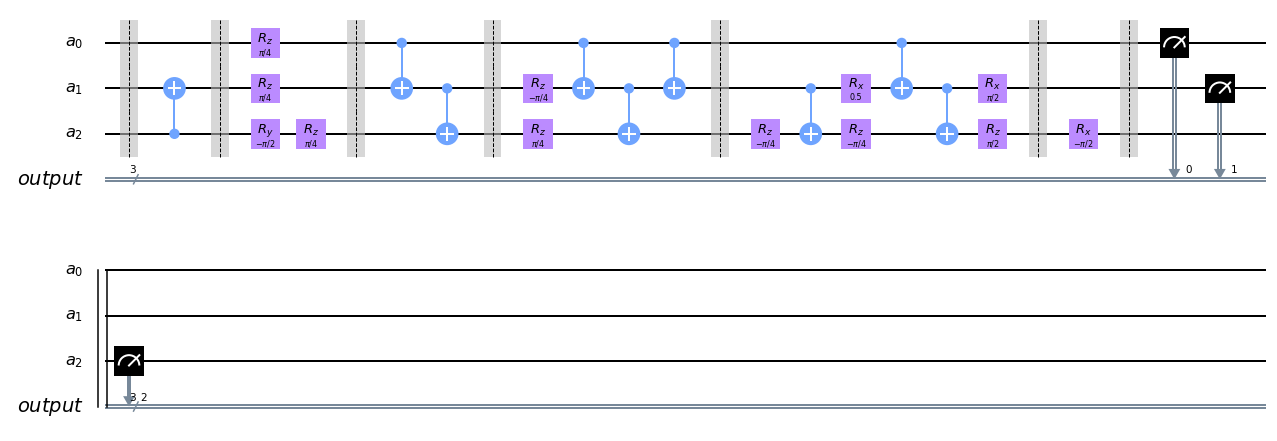

In [15]:
qc.draw(output='mpl')